In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

In [2]:
sp_500 = yf.download("^SPX", start = "2023-11-18", end = "2024-11-18" )

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.read_csv("/Users/elgun/Desktop/Advanced-Option-Pricing-and-Volatility-Analysis/data/data_for_project.csv")

In [4]:
sp_500 = sp_500["Close"]

In [5]:
S_0 = sp_500.iloc[-1]
S_0

5870.6201171875

In [6]:
sigma = (np.std(sp_500, ddof= 1)) / S_0
sigma

0.06421755492996055

In [7]:
r =  0.441

In [8]:
import numpy as np
from scipy.stats import norm


# Extract necessary columns
K = data['strike']
T = data['Time to Maturity (Years)']

# Black-Scholes formula for call options
d1 = (np.log(S_0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Compute call prices
call_prices = S_0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Add BS prices to the dataframe
data['BS_Price'] = call_prices

# Display the first few rows with the computed prices
data[['contractSymbol', 'strike', 'Time to Maturity (Years)', 'fairPrice', 'BS_Price']].tail()


,contractSymbol,strike,Time to Maturity (Years),fairPrice,BS_Price
6443,SPX291221C09000000,9000.0,5.09863,297.2,4920.599235
6444,SPX291221C09200000,9200.0,5.09863,256.5,4899.487660
6445,SPX291221C09400000,9400.0,5.09863,181.5,4878.376084
6446,SPX291221C09600000,9600.0,5.09863,129.1,4857.264509
6447,SPX291221C10000000,10000.0,5.09863,119.0,4815.041359


In [9]:
# Define the Black-Scholes call price function
def black_scholes_call(S, K, T, r, sigma):

    """Calculate Black-Scholes call option price.
    
    Parameters:
    - S: Spot price
    - K: Strike price
    - T: Time to maturity (years)
    - r: Risk-free rate
    - sigma: Volatility
    
    Returns:
    - Call option price
    """
    # Handle edge case where T is 0 (option matures immediately)
    if T <= 0:
        return max(0, S_0 - K)
    
    # Compute d1 and d2
    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Compute call price
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Apply the function to the dataset
data['BS_Price'] = data.apply(
    lambda row: black_scholes_call(S_0, row['strike'], row['Time to Maturity (Years)'], r, sigma),
    axis=1
)

# Display the first few rows to compare
data[['contractSymbol', 'strike', 'Time to Maturity (Years)', 'fairPrice', 'BS_Price']].tail()


,contractSymbol,strike,Time to Maturity (Years),fairPrice,BS_Price
6443,SPX291221C09000000,9000.0,5.09863,297.2,4920.599235
6444,SPX291221C09200000,9200.0,5.09863,256.5,4899.487660
6445,SPX291221C09400000,9400.0,5.09863,181.5,4878.376084
6446,SPX291221C09600000,9600.0,5.09863,129.1,4857.264509
6447,SPX291221C10000000,10000.0,5.09863,119.0,4815.041359


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes formula for call price
#def black_scholes_call(S, K, T, r, sigma):
#    if T <= 0:
#        return max(0, S - K)
#    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
#    d2 = d1 - sigma * np.sqrt(T)
#    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Implied volatility function
def implied_volatility(S, K, T, r, market_price):
    def objective_function(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price
    try:
        return brentq(objective_function, 1e-5, 5.0)  # Bounds: 1e-5 to 5.0
    except ValueError:
        return np.nan  # Return NaN if no solution found



# Constants (you can adjust as needed)
S = S_0  # Spot price
r = r  # Risk-free rate

# Apply the implied volatility calculation to each row
data['Implied Volatility'] = [
    implied_volatility(S_0, row['strike'], row['Time to Maturity (Years)'], r, row['fairPrice'])
    for _, row in data.iterrows()
]




# Display the first few rows with the new column
data


,contractSymbol,strike,Time to Maturity (Years),fairPrice,BS_Price,Implied Volatility
0,SPXW241118C03200000,3200.0,0.005479,2625.03,2678.343385,NaN
1,SPXW241118C03800000,3800.0,0.005479,1927.61,2079.791497,NaN
2,SPXW241118C04000000,4000.0,0.005479,1963.98,1880.274202,4.303893
3,SPXW241118C04500000,4500.0,0.005479,1255.98,1381.480962,NaN
4,SPXW241118C04800000,4800.0,0.005479,1082.40,1082.205019,0.946285
...,...,...,...,...,...,...
6443,SPX291221C09000000,9000.0,5.098630,297.20,4920.599235,NaN
6444,SPX291221C09200000,9200.0,5.098630,256.50,4899.487660,NaN
6445,SPX291221C09400000,9400.0,5.098630,181.50,4878.376084,NaN
6446,SPX291221C09600000,9600.0,5.098630,129.10,4857.264509,NaN


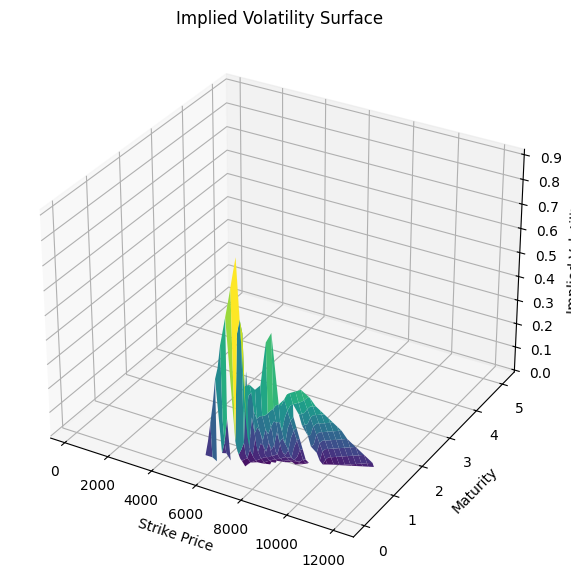

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D



# Assuming columns: 'Strike', 'Maturity', 'ImpliedVol'
strikes = data['strike'].values
maturities = data['Time to Maturity (Years)'].values
implied_vols = data['Implied Volatility'].values

# Step 2: Create a grid
strike_grid = np.linspace(min(strikes), max(strikes), 100)
maturity_grid = np.linspace(min(maturities), max(maturities), 100)
strike_grid, maturity_grid = np.meshgrid(strike_grid, maturity_grid)

# Step 3: Interpolate the data
iv_grid = griddata(
    (strikes, maturities),
    implied_vols,
    (strike_grid, maturity_grid),
    method='linear'
)

# Step 4: Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    strike_grid, maturity_grid, iv_grid,
    cmap='viridis', edgecolor='none'
)

ax.set_title("Implied Volatility Surface")
ax.set_xlabel("Strike Price")
ax.set_ylabel("Maturity")
ax.set_zlabel("Implied Volatility")
plt.show()
